# Programming Task -- KNN
#### Copyright © 2020 Novita G.
(I used English in order to upload to my Github too :D)

## Import Library 

In [1]:
import sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
df_diabetes = pd.read_csv('Diabetes.csv')
pd.set_option('display.max_rows', None)
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Data Preprocessing
### 1. Data Cleaning

In [4]:
# Check for missing values
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
'''
Uncomment the code below if there are missing values
'''
# df_diabetes = df_diabetes.apply(lambda x: x.fillna(x.mean()),axis=0)

'\nUncomment the code below if there are missing values\n'

In [6]:
# Check for duplicates
df_diabetes.duplicated().sum()

0

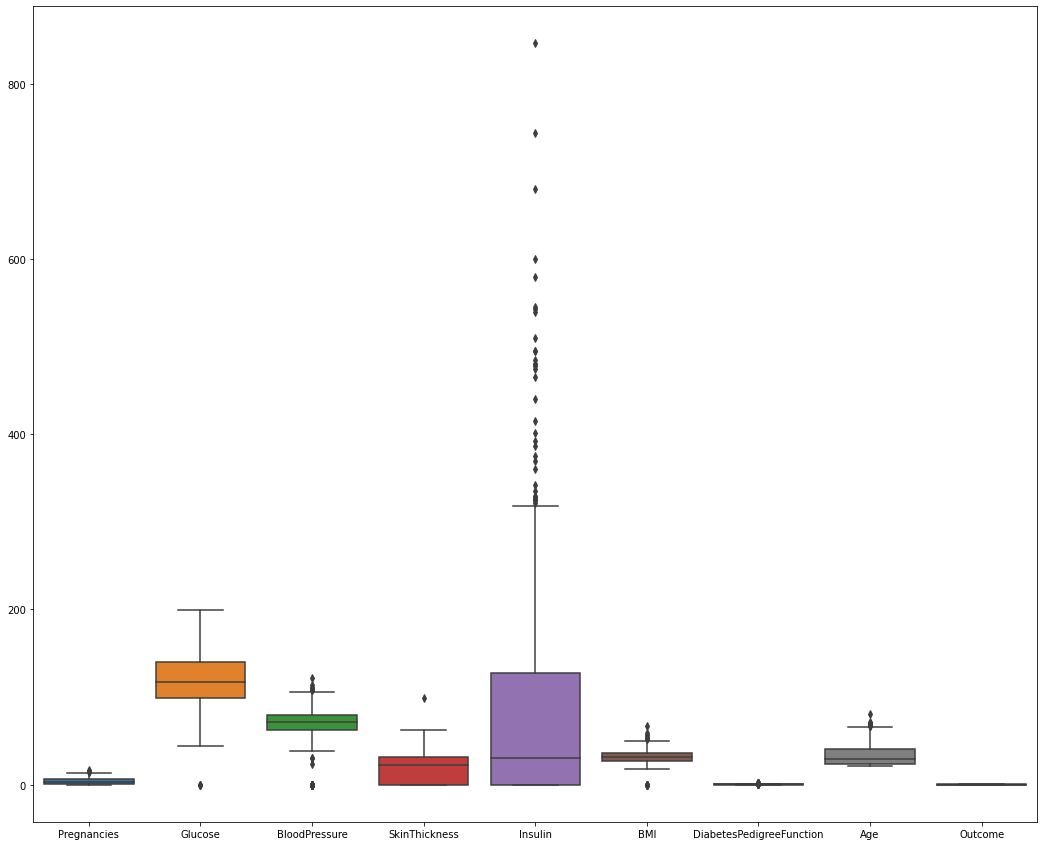

In [7]:
# Check for outliers
f, ax = plt.subplots(figsize=(18, 15))
sns.boxplot(data=(df_diabetes))
plt.show()

From the graph above, we can see that there are some outliers, so we have to remove those outliers.

In [8]:
# Remove outliers
Q1 = df_diabetes.quantile(0.25)
Q3 = df_diabetes.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

In [9]:
df_filtered = df_diabetes.loc[~((df_diabetes < (Q1 - 1.5 * IQR)).any(axis=1)|(df_diabetes > (Q3 + 1.5 * IQR)).any(axis=1))].dropna()
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,4,110,92,0,0,37.6,0.191,30,0
7,10,168,74,0,0,38.0,0.537,34,1
8,5,166,72,19,175,25.8,0.587,51,1
9,0,118,84,47,230,45.8,0.551,31,1


In [10]:
df_filtered.shape

(639, 9)

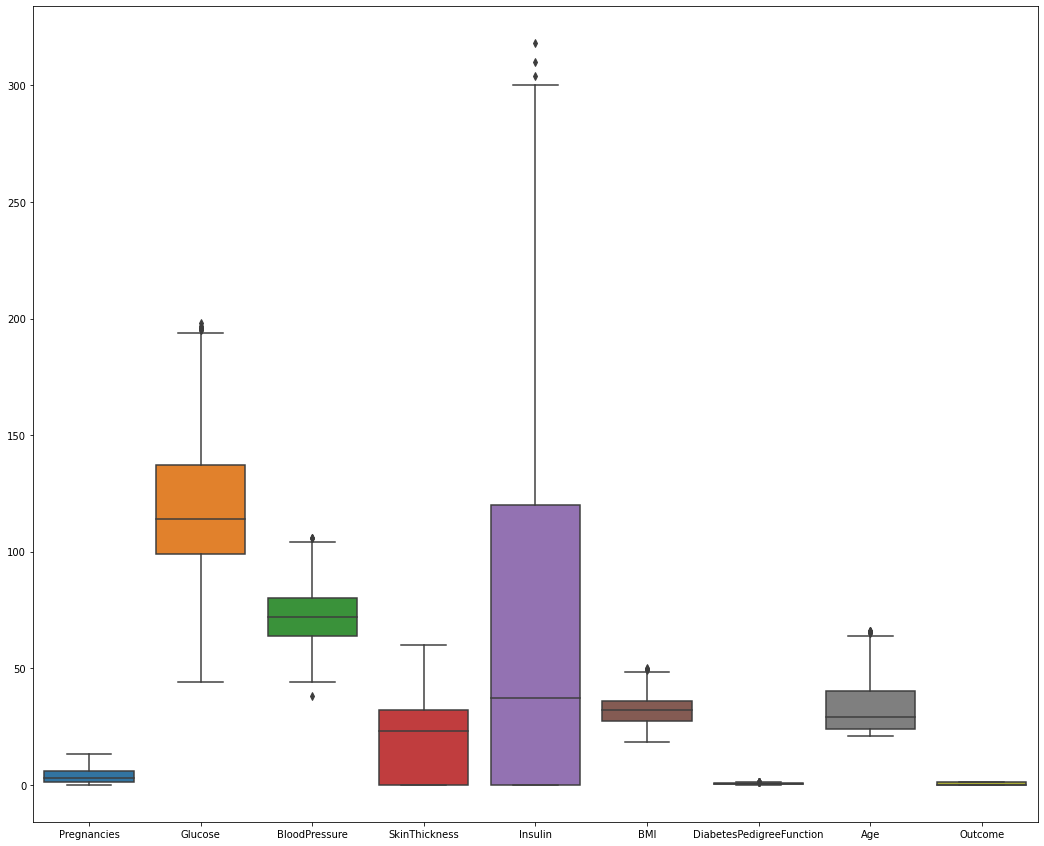

In [11]:
# Check for outliers
f, ax = plt.subplots(figsize=(18, 15))
sns.boxplot(data=(df_filtered))
plt.show()

Now we can see that the outliers are removed.

### 2. Data Transformation
#### Features Selection

In [12]:
features = df_filtered.copy().iloc[:, :8].values
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

#### Data Normalization (Min Max Normalization)

In [14]:
def minMaxScaler():
    for row in range(len(features)):
        for col in range(len(features[0])):
            features[row][col] = (features[row][col] - (df_filtered[df_filtered.columns[col]]).min())/((df_filtered[df_filtered.columns[col]]).max() - (df_filtered[df_filtered.columns[col]]).min())

    return features

In [15]:
df_norm = minMaxScaler()
df_norm = pd.DataFrame(df_norm)
df_norm.columns=[df_filtered.columns[:8]]
df_norm # This is the normalized output

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.484277,0.493261,0.644444
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.264151,0.245283,0.222222
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.160377,0.533693,0.244444
3,0.076923,0.292208,0.411765,0.383333,0.295597,0.311321,0.079964,0.000000
4,0.384615,0.467532,0.529412,0.000000,0.000000,0.232704,0.110512,0.200000
5,0.230769,0.220779,0.176471,0.533333,0.276730,0.402516,0.152740,0.111111
6,0.307692,0.428571,0.794118,0.000000,0.000000,0.610063,0.101527,0.200000
7,0.769231,0.805195,0.529412,0.000000,0.000000,0.622642,0.412399,0.288889
8,0.384615,0.792208,0.500000,0.316667,0.550314,0.238994,0.457323,0.666667
9,0.000000,0.480519,0.676471,0.783333,0.723270,0.867925,0.424978,0.222222


## Splitting Training and Testing Data

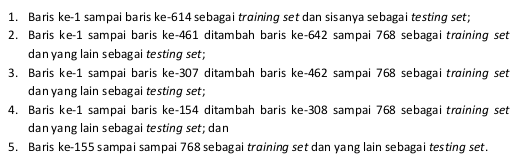

In [20]:
# Train test split 1
df_test_1 = df_diabetes[614:].reset_index(drop=True)
df_train_1 = df_diabetes[:614].reset_index(drop=True)

# Train test split 2
df_test_2 = df_diabetes[461:614].reset_index(drop=True)
df_train_2 = df_diabetes[~df_diabetes.isin(df_test_2)].dropna().reset_index(drop=True)

# Train test split 3
df_test_3 = df_diabetes[307:461].reset_index(drop=True)
df_train_3 = df_diabetes[~df_diabetes.isin(df_test_3)].dropna().reset_index(drop=True)

# Train test split 4
df_test_4 = df_diabetes[154:307].reset_index(drop=True)
df_train_4 = df_diabetes[~df_diabetes.isin(df_test_4)].dropna().reset_index(drop=True)

# Train test split 5
df_test_5 = df_diabetes[:154].reset_index(drop=True)
df_train_5 = df_diabetes[154:].reset_index(drop=True)

### KNN Procedures and Functions

In [21]:
def euclidean(data1, data2):
    dist = 0
    for i in range(len(data1) - 1):
        dist += (data1[i] - data2[i])**2
    return math.sqrt(dist)

In [22]:
def knn(df_test, df_train, k):
    predict = []
    for i in range(len(df_test)):
        d = []
        for j in range(len(df_train)):
            d.append((euclidean(df_test.iloc[i].tolist(), df_train.iloc[j].tolist()), j))
        d = sorted(d)
        
        idx_min = []
        for i in range(k):
            idx_min.append(d[i][1])
                             
        # Vote for the neighbor
        neighbor = []
        for i in idx_min:
            neighbor.append(df_train['Outcome'][i])
        predict.append(np.bincount(neighbor).argmax())
        
    df_test['Prediction'] = pd.DataFrame(predict)
    df_pred = df_test[['Outcome', 'Prediction']]
    df_pred.columns = ['Actual', 'Prediction']
    
    return df_pred

In [23]:
def evaluation(df):
    con_matrix = np.zeros((2, 2))
    
    for i in range(len(df)):
        # Actual values arranged horizontally and
        # pediction are arranged vertically
        con_matrix[df['Prediction'][i]][df['Actual'][i]] += 1
    
    # Evaluation starts here
    dict_eval = {'Precision': 0, 'Recall': 0, 'F1 score (average)': 0}
    total_prec = 0
    total_rec = 0
    total_f1 = 0
    total_mat = 0
    correct = 0
    
    for i in range(len(con_matrix[0])):
        precision = con_matrix[i][i]/sum(con_matrix[i])
        recall = con_matrix[i][i]/sum(col[i] for col in con_matrix)
        f1_score = (2 * precision * recall)/(precision + recall)
        
        total_mat += sum(con_matrix[i])
        correct += con_matrix[i][i]
        
        total_prec += precision
        total_rec += recall
        total_f1 += f1_score
        
    dict_eval['Precision'] = total_prec/3
    dict_eval['Recall'] = total_rec/3
    dict_eval['F1 score (average)'] = total_f1/3
    acc = correct/total_mat
    
    return con_matrix, acc, dict_eval

In [24]:
# Defining testing data and training data
data_test = [df_test_1, df_test_2, df_test_3, df_test_4, df_test_5]
data_train = [df_train_1, df_train_2, df_train_3, df_train_4, df_train_5]

In [25]:
k = 10 # hypertune parameters:

cv_fold = len(data_test)
i = 0
k_f1 = {}
k_acc = {}

for i in range(k):
    fold_f1 = []
    fold_acc = []
    
    print('k = %s' % str(i + 1))
    
    for fold in range(cv_fold):
        print('Fold-%s' % str(fold + 1))
        
        df_pred = knn(data_test[fold], data_train[fold], i + 1)
        con_matrix, acc, dict_eval = evaluation(df_pred)
        print(con_matrix)
        
        fold_f1.append(dict_eval['F1 score (average)'])
        fold_acc.append(acc)
    
    k_f1[i + 1] = np.mean(fold_f1)
    k_acc[i + 1] = np.mean(fold_acc)    
    
    print('-------------------------------------------------------')

print('Average F1-score by each k:', k_f1)
print()
print('Average accuracy by each k:', k_acc)
print('-------------------------------------------------------')
    
print('Best k (by F1 score):', max(k_f1, key = k_f1.get))
print('Best k (by accuracy):', max(k_acc, key = k_acc.get))
    

k = 1
Fold-1
[[71. 31.]
 [28. 24.]]
Fold-2
[[115.   0.]
 [  0.  38.]]
Fold-3
[[97.  0.]
 [ 0. 57.]]
Fold-4
[[89.  0.]
 [ 0. 64.]]
Fold-5
[[73. 28.]
 [27. 26.]]
-------------------------------------------------------
k = 2
Fold-1
[[87. 37.]
 [12. 18.]]
Fold-2
[[115.  12.]
 [  0.  26.]]
Fold-3
[[97. 24.]
 [ 0. 33.]]
Fold-4
[[89. 31.]
 [ 0. 33.]]
Fold-5
[[89. 39.]
 [11. 15.]]
-------------------------------------------------------
k = 3
Fold-1
[[73. 23.]
 [26. 32.]]
Fold-2
[[108.   6.]
 [  7.  32.]]
Fold-3
[[90. 13.]
 [ 7. 44.]]
Fold-4
[[81. 19.]
 [ 8. 45.]]
Fold-5
[[77. 26.]
 [23. 28.]]
-------------------------------------------------------
k = 4
Fold-1
[[85. 32.]
 [14. 23.]]
Fold-2
[[111.  17.]
 [  4.  21.]]
Fold-3
[[94. 28.]
 [ 3. 29.]]
Fold-4
[[83. 33.]
 [ 6. 31.]]
Fold-5
[[87. 32.]
 [13. 22.]]
-------------------------------------------------------
k = 5
Fold-1
[[78. 24.]
 [21. 31.]]
Fold-2
[[104.  12.]
 [ 11.  26.]]
Fold-3
[[87. 21.]
 [10. 36.]]
Fold-4
[[74. 26.]
 [15. 38.]]
Fold-5

## You Can do Your Atomic Testing Here

In [26]:
df_pred_test_only = knn(df_test_1, df_train_1, 2)
df_pred_test_only

,Actual,Prediction
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
5,1,0
6,0,0
7,0,0
8,0,1
9,0,0


In [27]:
# df_pred.groupby(['Actual', 'Prediction'])[['Actual', 'Prediction']].count()


In [28]:
con_matrix_test_only, acc_test_only, dict_eval_test_only = evaluation(df_pred_test_only)
pd.DataFrame(con_matrix_test_only)

,0,1
0,87.0,37.0
1,12.0,18.0


In [29]:
print('Accuracy:', acc_test_only)
print(dict_eval_test_only)

Accuracy: 0.6818181818181818
{'Precision': 0.4338709677419355, 'Recall': 0.402020202020202, 'F1 score (average)': 0.40126615668689}


## References
- https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1
- https://www.jaredrentz.com/knn-k-nearest-neighbors/